In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
air = pd.read_csv('airline cost new.csv')
print(air.head())
x = air['num_pass'].values
y = air['cost'].values

   num_pass  cost
0        61  4280
1        63  4080
2        67  4420
3        69  4170
4        70  4480


In [6]:
type(x)

numpy.ndarray

In [10]:
x_mean = np.mean(x)
y_mean = np.mean(y)
n = len(x)

In [11]:
numerator = 0
denominator = 0

for i in range(n):
    numerator += (x[i]-x_mean)*(y[i]-y_mean)
    denominator += (x[i]-x_mean)**2

b1 = numerator/denominator
b0 = y_mean - (b1*x_mean)

print(b1, b0)

39.89413456928241 1612.9763145277288


OLS Approach

In [14]:
xc = sm.add_constant(x)
model = sm.OLS(y, xc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           4.23e-22
Time:                        13:57:28   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.0

In [15]:
vs = pd.read_csv('virginia semiconductors.csv')
vs.head()

,Size_of_Purchase,Company_Size,%Imports,Distance,Central_Purchaser
0,27.9,25.6,41,18,0
1,89.6,109.8,16,75,0
2,12.8,39.4,29,14,0
3,34.9,16.7,31,117,0
4,408.6,278.4,14,209,1


In [16]:
y = vs['Size_of_Purchase']
x = vs.drop('Size_of_Purchase', axis=1)
xc = sm.add_constant(x)

In [18]:
model = sm.OLS(y, xc)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Size_of_Purchase   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     55.00
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.28e-07
Time:                        14:44:02   Log-Likelihood:                -82.436
No. Observations:                  17   AIC:                             174.9
Df Residuals:                      12   BIC:                             179.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6686     30.10

In [23]:
y = vs['Size_of_Purchase']
x = vs.drop(['Size_of_Purchase','%Imports','Distance'], axis=1)
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:       Size_of_Purchase   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              369.2
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                    1.75e-13
Time:                        15:04:27   Log-Likelihood:                         -83.518
No. Observations:                  17   AIC:                                      171.0
Df Residuals:                      15   BIC:                                      172.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

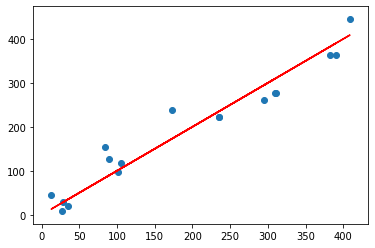

In [25]:
y_pred = result.predict(x)
plt.plot(y, y, 'r')
plt.scatter(y, y_pred)
plt.show()